# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as opt

from util import losses as loss
from util import loaders as load
from util import training as train
from util import helpers as helper
from models import networks as n


# Setup Network, Data Generator, Optimizer, Losses

In [2]:


############################################################################
# Network
############################################################################

res_net = n.CustomResnet(51)
res_net.cuda()

############################################################################
# Loss
############################################################################

mse_crit = nn.MSELoss()
point_crit = loss.PointLoss().cuda()

############################################################################
# Optimizer
############################################################################

lr = 1e-3
lr_array = np.array([lr/100,lr/10,lr])
lr_groups = res_net.lr_groups()
opt_params = [{"params":lr_groups[0].parameters(),"lr":lr_array[0]},
              {"params":lr_groups[1].parameters(),"lr":lr_array[1]},
              {"params":lr_groups[2].parameters(),"lr":lr_array[2]}]

adam_opt = opt.Adam(opt_params,betas=(0.9, 0.999),weight_decay= .0001)

############################################################################
# Data Generators
############################################################################

transform = load.NormDenorm([.5, .5, .5], [.5, .5, .5])
train_data= load.LandMarkGenerator( transform, output_res=96, size = 10000, rand_rot = .7)
test_data = load.LandMarkGenerator( transform, output_res=96, size = 300, rand_rot = .7)   
batch_size = 8
mtrain = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=8, shuffle=True, drop_last=True)
mtest  = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=8, shuffle=False, drop_last=True)

############################################################################
# Train Dictionary
############################################################################

train_dict = {
    "train_loader":mtrain,
    "test_loader":mtest,
    "opt":adam_opt,
    "net":res_net,
    "mse_crit":mse_crit,
    "point_crit":point_crit
}

output_name = "test_"

# Example Training Data

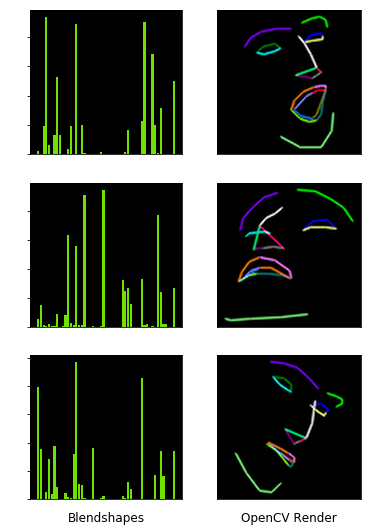

In [3]:
% matplotlib inline
helper.view_dataset(train_data,transform)


# Training Round One

Run #1


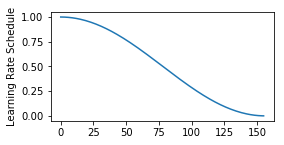

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:False
Layer 5 : Grad:False
train mse_loss: 0.05193861946463585   train point_loss: 0.00559327332302928
test mse_loss: 0.047486767172813416   test point_loss: 0.005161128472536802
Done
Run #2


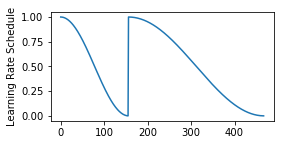

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.047770414501428604   train point_loss: 0.004836392588913441
test mse_loss: 0.045159753412008286   test point_loss: 0.004456390161067247
Done
Run #3


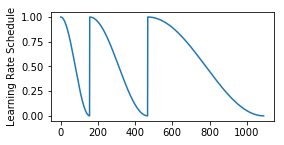

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True


train mse_loss: 0.040971871465444565   train point_loss: 0.003958237357437611
test mse_loss: 0.035181667655706406   test point_loss: 0.0032953033223748207
Done
Run #4


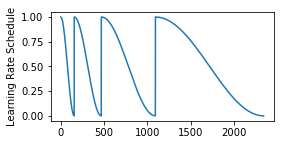

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03584778681397438   train point_loss: 0.003421007888391614
test mse_loss: 0.038944657891988754   test point_loss: 0.0038635944947600365


train mse_loss: 0.03231439366936684   train point_loss: 0.0030554919503629208
test mse_loss: 0.029202526435256004   test point_loss: 0.0027054278180003166
Done
Run #5


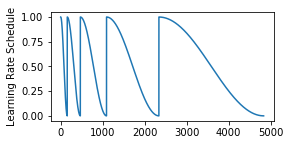

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03161541745066643   train point_loss: 0.003038545371964574
test mse_loss: 0.032769642770290375   test point_loss: 0.003171186428517103
train mse_loss: 0.029935520142316818   train point_loss: 0.00289288186468184
test mse_loss: 0.034255918115377426   test point_loss: 0.0033527137711644173
train mse_loss: 0.030256427824497223   train point_loss: 0.0029553757049143314
test mse_loss: 0.02784264087677002   test point_loss: 0.002732513938099146


train mse_loss: 0.026050830259919167   train point_loss: 0.002560799475759268
test mse_loss: 0.024307385087013245   test point_loss: 0.0023496500216424465
Done
Run #6


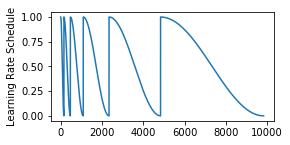

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.028429925441741943   train point_loss: 0.002805290976539254
test mse_loss: 0.031180182471871376   test point_loss: 0.003144442103803158
train mse_loss: 0.027300985530018806   train point_loss: 0.0026970256585627794
test mse_loss: 0.029281876981258392   test point_loss: 0.0028826387133449316
train mse_loss: 0.028134148567914963   train point_loss: 0.0027998536825180054
test mse_loss: 0.026776166632771492   test point_loss: 0.0025305983144789934
train mse_loss: 0.024851946160197258   train point_loss: 0.002509364392608404
test mse_loss: 0.030135542154312134   test point_loss: 0.0029883598908782005
train mse_loss: 0.028020476922392845   train point_loss: 0.0028179786168038845
test mse_loss: 0.026950150728225708   test point_loss: 0.0028985582757741213
train mse_loss: 0.02632523886859417   train point_loss: 0.002663582330569625
test mse_loss: 0.024877900

In [4]:

lr = 1e-3  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)
    freeze = (i-1)*2
    if i == 4:
        freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)
    

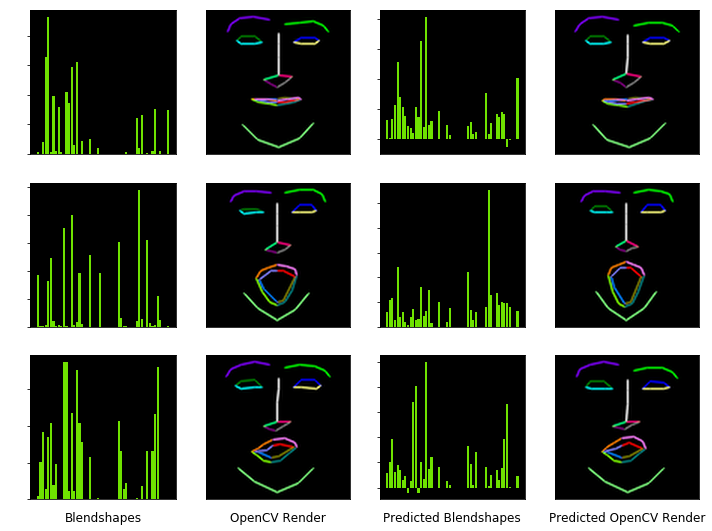

In [5]:

helper.view_predictions(res_net,train_data)
helper.export_onnx(res_net,'output/'+output_name+'run_1')


# Training Round Two

Run #1


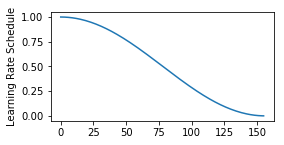

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True


train mse_loss: 0.022104352712631226   train point_loss: 0.002288586925715208
test mse_loss: 0.019803931936621666   test point_loss: 0.0020739343017339706
Done
Run #2


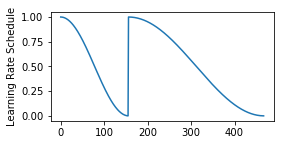

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True


train mse_loss: 0.021764934062957764   train point_loss: 0.002286805771291256
test mse_loss: 0.021257678046822548   test point_loss: 0.0021542957983911037
Done
Run #3


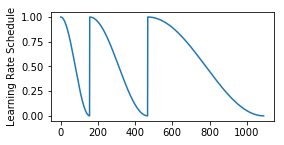

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.021640093997120857   train point_loss: 0.0022423374466598034
test mse_loss: 0.020058177411556244   test point_loss: 0.0021229104604572058
Done
Run #4


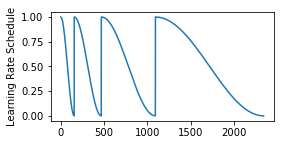

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.02135707624256611   train point_loss: 0.002235816093161702
test mse_loss: 0.021052420139312744   test point_loss: 0.002190761500969529


train mse_loss: 0.021091582253575325   train point_loss: 0.002218023408204317
test mse_loss: 0.020804569125175476   test point_loss: 0.002202005358412862
Done
Run #5


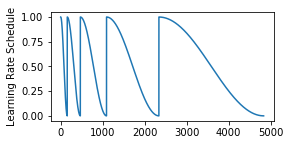

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.020981619134545326   train point_loss: 0.002213484840467572
test mse_loss: 0.02005460485816002   test point_loss: 0.002097410149872303
train mse_loss: 0.02093600109219551   train point_loss: 0.0022210250608623028
test mse_loss: 0.019973672926425934   test point_loss: 0.002187425037845969
train mse_loss: 0.02085925079882145   train point_loss: 0.002197778318077326
test mse_loss: 0.019675610587000847   test point_loss: 0.0020825290121138096


train mse_loss: 0.020290810614824295   train point_loss: 0.002144863596186042
test mse_loss: 0.01927598938345909   test point_loss: 0.0020649819634854794
Done
Run #6


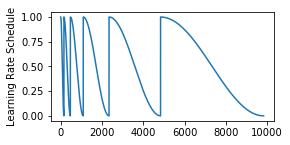

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.020442115142941475   train point_loss: 0.0021644048392772675
test mse_loss: 0.020722873508930206   test point_loss: 0.002158548217266798
train mse_loss: 0.020194413140416145   train point_loss: 0.002150285057723522
test mse_loss: 0.019803067669272423   test point_loss: 0.0020569749176502228
train mse_loss: 0.0203509833663702   train point_loss: 0.002155655762180686
test mse_loss: 0.01860521361231804   test point_loss: 0.0020535297226160765
train mse_loss: 0.01983395777642727   train point_loss: 0.002115434966981411
test mse_loss: 0.018697107210755348   test point_loss: 0.002122581470757723
train mse_loss: 0.020282728597521782   train point_loss: 0.002174610970541835
test mse_loss: 0.019324887543916702   test point_loss: 0.0020983966533094645
train mse_loss: 0.019831618294119835   train point_loss: 0.002137338975444436
test mse_loss: 0.018955746665596

In [6]:

lr = 1e-4  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)


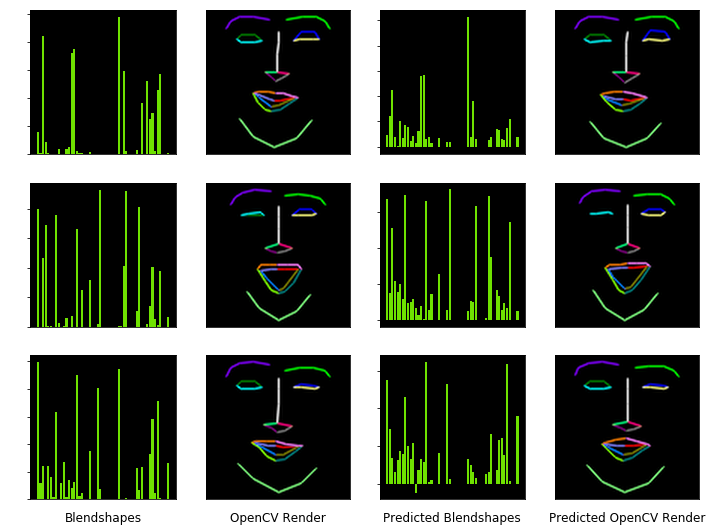

In [7]:

helper.view_predictions(res_net,train_data)
helper.export_onnx(res_net,'output/'+output_name+'run_2')


# Training Round Three (Test )

Run #1


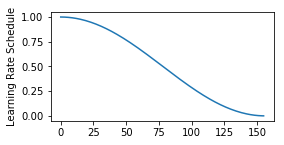

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True


train mse_loss: 0.018925398588180542   train point_loss: 0.0020824684761464596
test mse_loss: 0.017979761585593224   test point_loss: 0.001943123061209917
Done
Run #2


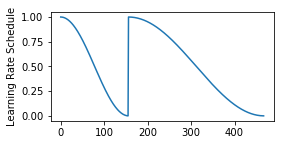

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True


train mse_loss: 0.01919453591108322   train point_loss: 0.00208077859133482
test mse_loss: 0.01875416375696659   test point_loss: 0.0020771673880517483
Done
Run #3


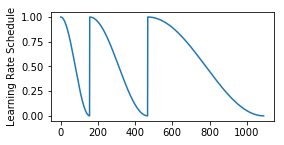

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.019137684255838394   train point_loss: 0.0020654872059822083
test mse_loss: 0.017978433519601822   test point_loss: 0.0019637756049633026
Done
Run #4


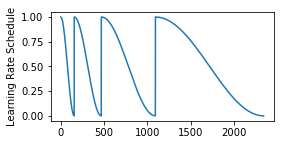

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.019008951261639595   train point_loss: 0.0020590191707015038
test mse_loss: 0.019162805750966072   test point_loss: 0.0020001940429210663
train mse_loss: 0.018895642831921577   train point_loss: 0.002062389627099037
test mse_loss: 0.018480250611901283   test point_loss: 0.0019950196146965027
Done
Run #5


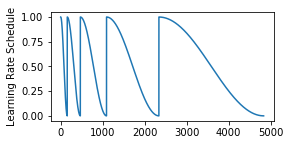

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.01911373808979988   train point_loss: 0.002059100428596139
test mse_loss: 0.018081393092870712   test point_loss: 0.00203198054805398
train mse_loss: 0.01914960704743862   train point_loss: 0.002064937027171254
test mse_loss: 0.018305964767932892   test point_loss: 0.0019955968018621206
train mse_loss: 0.019058747217059135   train point_loss: 0.002058883663266897
test mse_loss: 0.017969638109207153   test point_loss: 0.0020017775241285563
train mse_loss: 0.018946662545204163   train point_loss: 0.0020657547283917665
test mse_loss: 0.017880195751786232   test point_loss: 0.001966166542842984
Done
Run #6


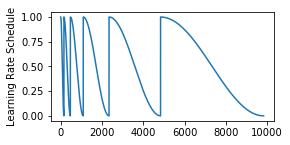

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.01892719976603985   train point_loss: 0.0020521115511655807
test mse_loss: 0.018450124189257622   test point_loss: 0.0020084776915609837
train mse_loss: 0.019085964187979698   train point_loss: 0.0020586110185831785
test mse_loss: 0.018198754638433456   test point_loss: 0.0019817433785647154
train mse_loss: 0.018969876691699028   train point_loss: 0.0020580387208610773
test mse_loss: 0.018487755209207535   test point_loss: 0.001991678960621357
train mse_loss: 0.018905969336628914   train point_loss: 0.002044474007561803
test mse_loss: 0.01848643459379673   test point_loss: 0.0020054164342582226
train mse_loss: 0.018870390951633453   train point_loss: 0.002046037232503295
test mse_loss: 0.01869656890630722   test point_loss: 0.001990238670259714
train mse_loss: 0.01903386227786541   train point_loss: 0.0020499988459050655
test mse_loss: 0.018528167158

In [8]:

lr = 1e-5  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)
    

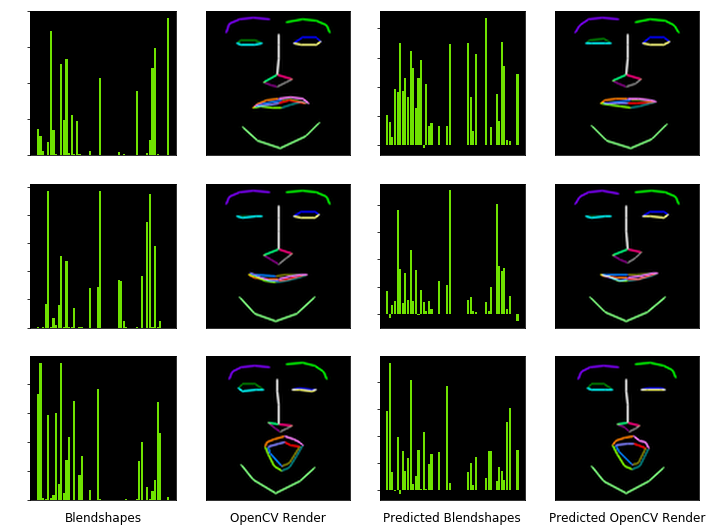

In [9]:

helper.view_predictions(res_net,train_data)
helper.export_onnx(res_net,'output/'+output_name+'run_3')
